In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('covid_19_data.csv')
df.drop(['SNo'], axis=1, inplace=True)
df.drop(['Last Update'], axis=1, inplace=True)

In [5]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


In [6]:
df.isnull().sum()

ObservationDate       0
Province/State     2769
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [16]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')

In [17]:
df_agg = df.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [18]:
df_agg['Infected'] = df_agg['Confirmed'] - df_agg['Deaths'] - df_agg['Recovered']

In [19]:
df_agg

,ObservationDate,Confirmed,Deaths,Recovered,Infected
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0
5,2020-01-27,2927.0,82.0,61.0,2784.0
6,2020-01-28,5578.0,131.0,107.0,5340.0
7,2020-01-29,6165.0,133.0,126.0,5906.0
8,2020-01-30,8235.0,171.0,143.0,7921.0
9,2020-01-31,9925.0,213.0,222.0,9490.0


In [20]:
features = ['Confirmed', 'Deaths', 'Recovered', 'Infected']
X = df_agg[features]
y_confirmed = df_agg['Confirmed']
y_deaths = df_agg['Deaths']
y_recovered = df_agg['Recovered']
y_infected = df_agg['Infected']

X_train, X_test, y_train_confirmed, y_test_confirmed = train_test_split(X, y_confirmed, test_size=0.2)
X_train, X_test, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2)
X_train, X_test, y_train_recovered, y_test_recovered = train_test_split(X, y_recovered, test_size=0.2)
X_train, X_test, y_train_infected, y_test_infected = train_test_split(X, y_infected, test_size=0.2)

In [57]:
from sklearn.linear_model import Ridge

In [39]:
model_confirmed = LinearRegression()
model_confirmed.fit(X_train.values, y_train_confirmed.values)

model_deaths = LinearRegression()
model_deaths.fit(X_train.values, y_train_deaths.values)

model_recovered = LinearRegression()
model_recovered.fit(X_train.values, y_train_recovered.values)

model_infected = LinearRegression()
model_infected.fit(X_train.values, y_train_infected.values)

LinearRegression()

In [40]:
last_row = df_agg.iloc[-1]

predictions = []

for day in range(1, 8):
    current_features = last_row[features].values.reshape(1, -1)
    
    predicted_confirmed = model_confirmed.predict(current_features)[0]
    predicted_deaths = model_deaths.predict(current_features)[0]
    predicted_recovered = model_recovered.predict(current_features)[0]
    predicted_infected = model_infected.predict(current_features)[0]
    
    next_date = last_row['ObservationDate'] + pd.Timedelta(days=day)
    
    predictions.append({
        'Day': next_date,
        'Confirmed': predicted_confirmed,
        'Deaths': predicted_deaths,
        'Recovered': predicted_recovered,
        'Infected': predicted_infected
    })
    
    last_row = pd.Series({
        'ObservationDate': next_date,
        'Confirmed': predicted_confirmed,
        'Deaths': predicted_deaths,
        'Recovered': predicted_recovered,
        'Infected': predicted_infected
    })

In [41]:
predictions_df = pd.DataFrame(predictions)
print(predictions_df)

         Day     Confirmed        Deaths     Recovered      Infected
0 2020-03-19  6.158487e+04  2.315795e+03  5.297705e+03  1.228690e+05
1 2020-03-21 -5.222302e+05 -7.892220e+03  2.893876e+05  1.056446e+05
2 2020-03-24 -7.241332e+06 -1.261158e+05  4.235420e+06 -1.216980e+05
3 2020-03-28 -9.014845e+07 -1.585161e+06  5.318129e+07 -2.928932e+06
4 2020-04-02 -1.115327e+09 -1.962690e+07  6.584973e+08 -3.763284e+07
5 2020-04-08 -1.379283e+10 -2.427336e+08  8.143938e+09 -4.667739e+08
6 2020-04-15 -1.705648e+11 -3.001708e+09  1.007101e+11 -5.773588e+09


In [33]:
y_pred = model_confirmed.predict(X_test)
len(y_pred)

12

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_confirmed, y_pred)
mse = mean_squared_error(y_test_confirmed, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test_confirmed, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 63633.10534944044
Mean Squared Error: 5788060277.009387
Root Mean Squared Error: 76079.3025533843
R-squared: -0.5824109900370178


In [53]:
df = pd.DataFrame({'Actual': y_test_confirmed, 'Predicted': y_pred})
df1 = df.head(1000)

In [54]:
df1 = df1.sort_values(by="Actual")

<Axes: xlabel='Actual', ylabel='Predicted'>

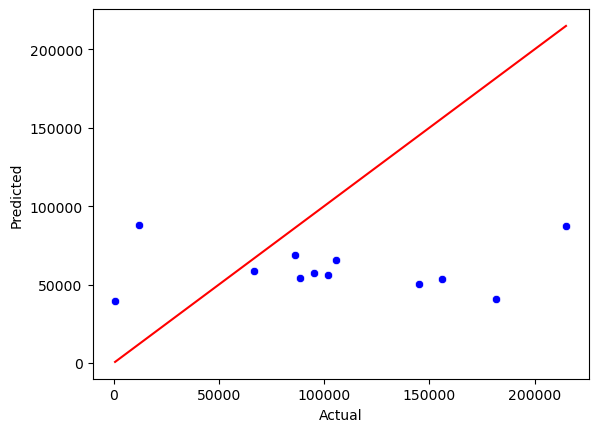

In [55]:
import seaborn as sns
sns.scatterplot(data=df1, x="Actual", y="Predicted", color = 'b')
sns.lineplot(data=df1, x="Actual", y="Actual", color = 'r')